<a href="https://colab.research.google.com/github/JuanGans/PCVK_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


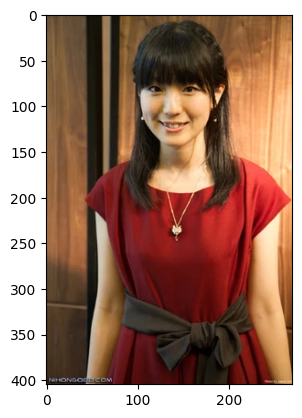

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/perempuan.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB?
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


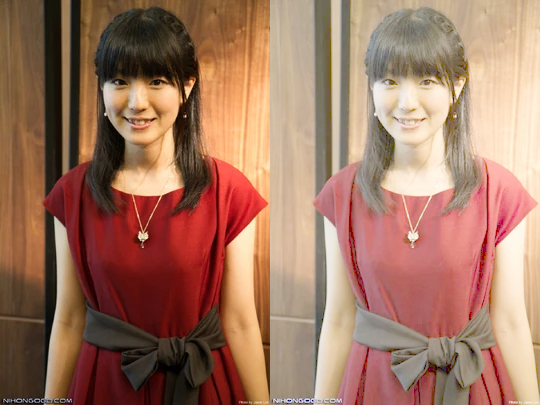

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

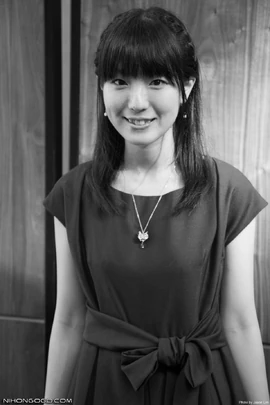

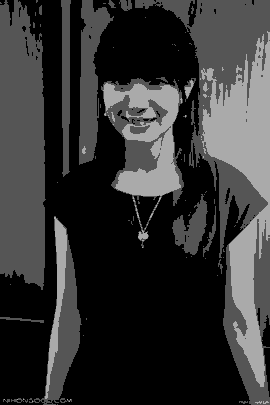

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)


original = cv.imread('/content/drive/MyDrive/PCVK/perempuan.tiff', cv.IMREAD_GRAYSCALE)


depth_image = np.zeros(original.shape, original.dtype)


depth_image = (original / level).astype(np.uint8) * level

# Menampilkan gambar asli dan gambar dengan bit depth yang diturunkan
cv2_imshow(original)
cv2_imshow(depth_image)


In [ ]:
import cv2 as cv
import glob

cv_img = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img_path)
    cv_img.append(n)


Nilai PSNR adalah 100 (dB)


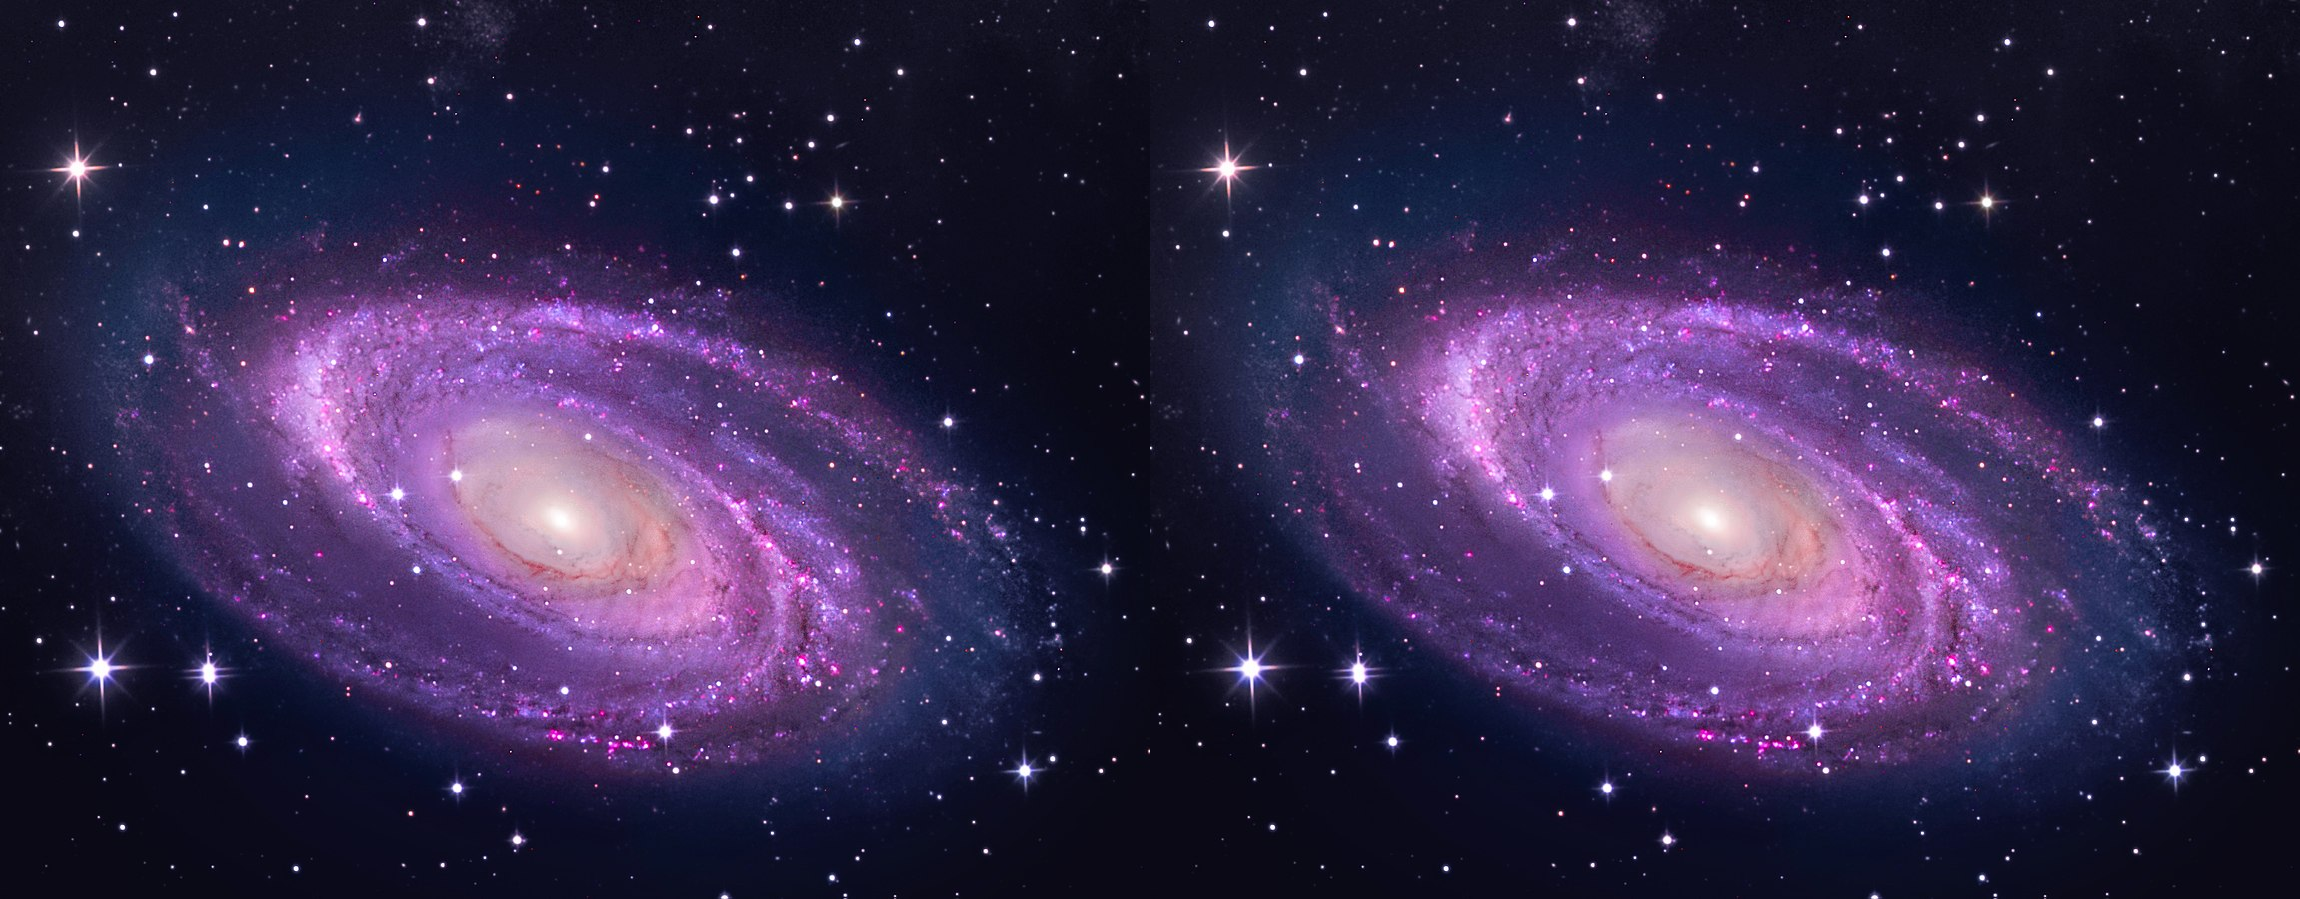

In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')


dst = cv_img[0]
noise_number = 1 # Change noise_number to 1 as cv_img only has 1 image.
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

- Nilai PSNR yang lebih tinggi menunjukkan bahwa gambar hasil penggabungan lebih mendekati kualitas gambar asli, sehingga gambar hasil tampak lebih bersih dan memiliki noise yang lebih sedikit.

4. 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

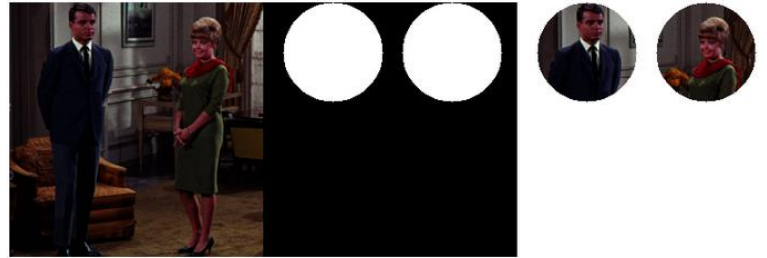

AND (Dan)

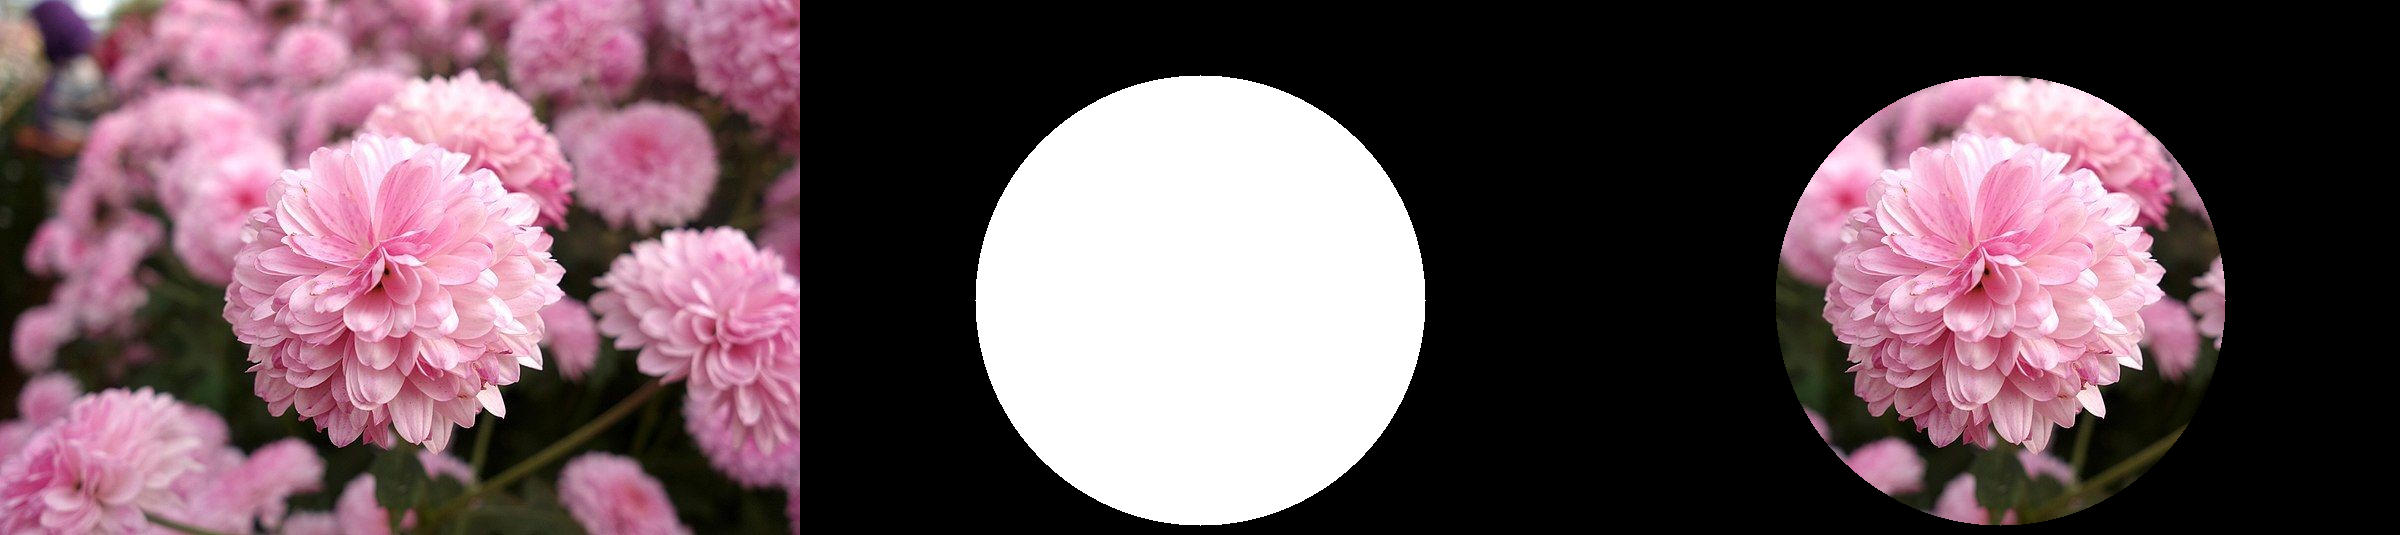

In [28]:

img_rose = cv.imread('/content/drive/MyDrive/PCVK/bunga.jpg')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (400, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

NOT
(komplemen)

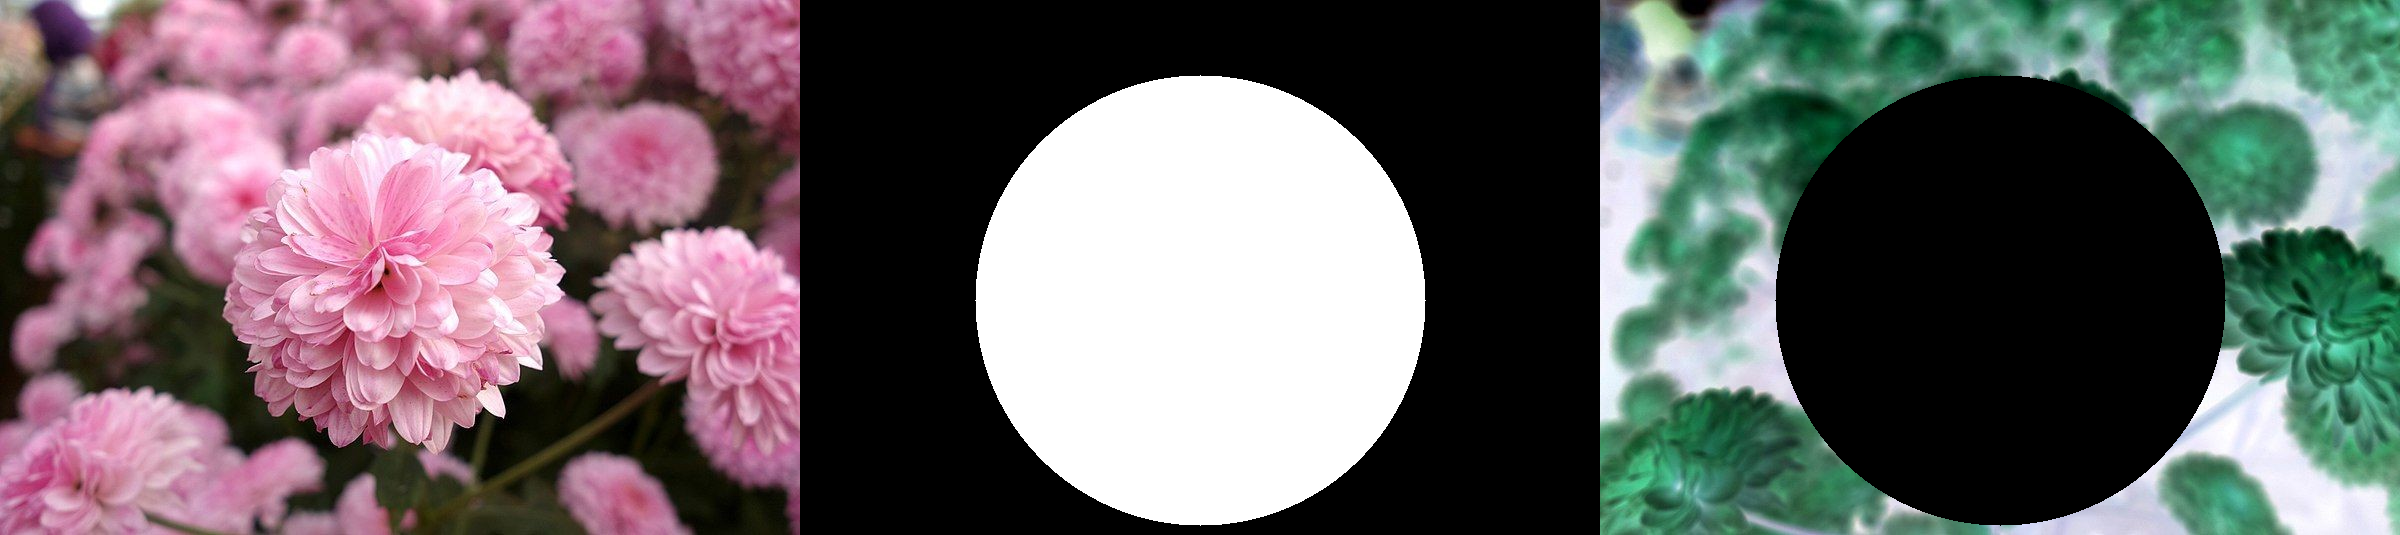

In [22]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (400, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

OR (Atau)

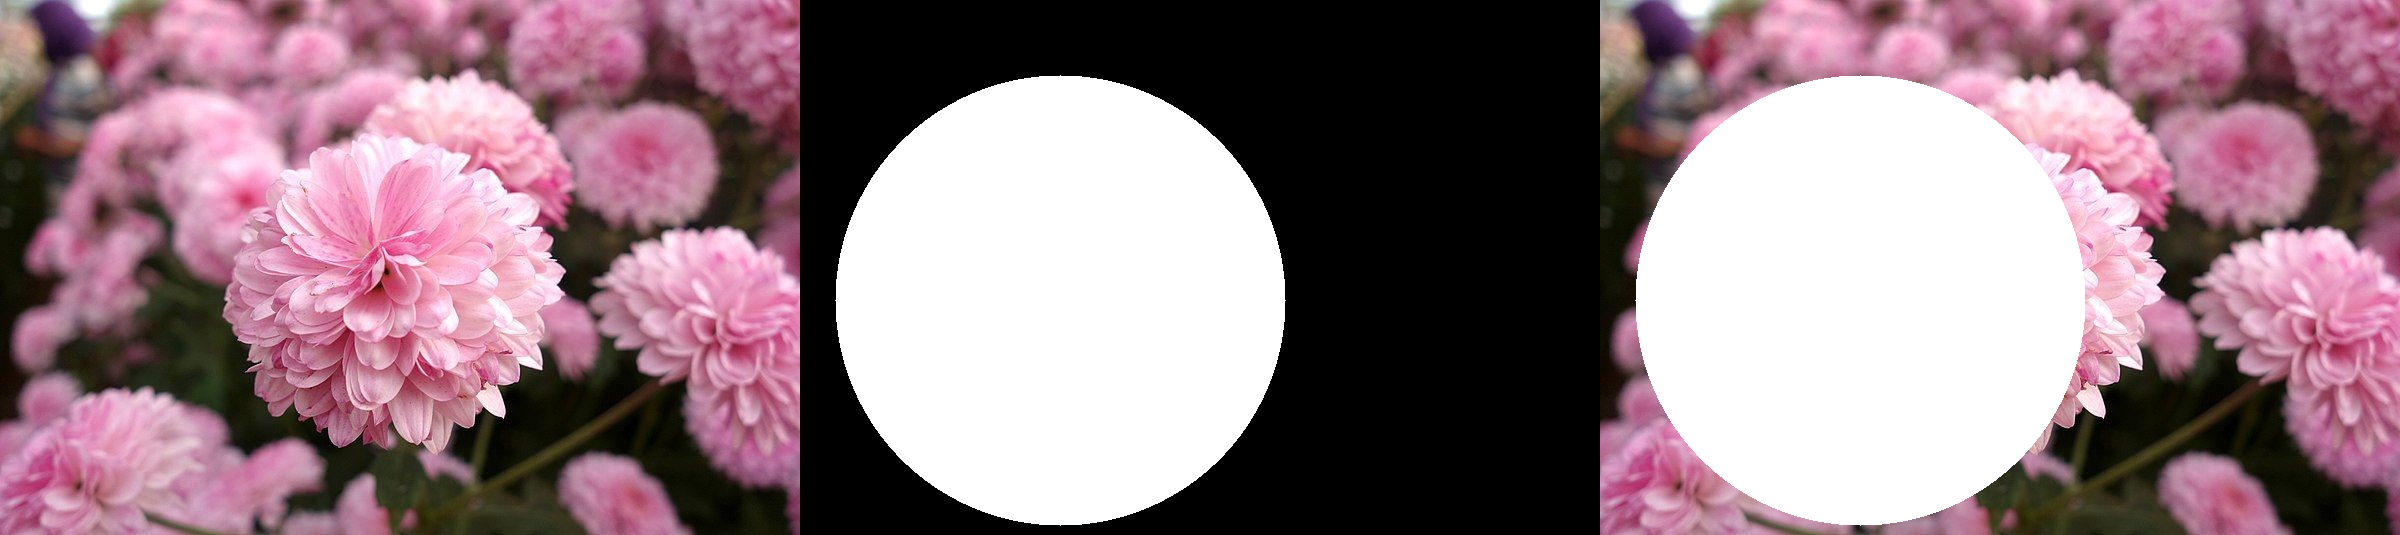

In [23]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)


NAND (Not
And)

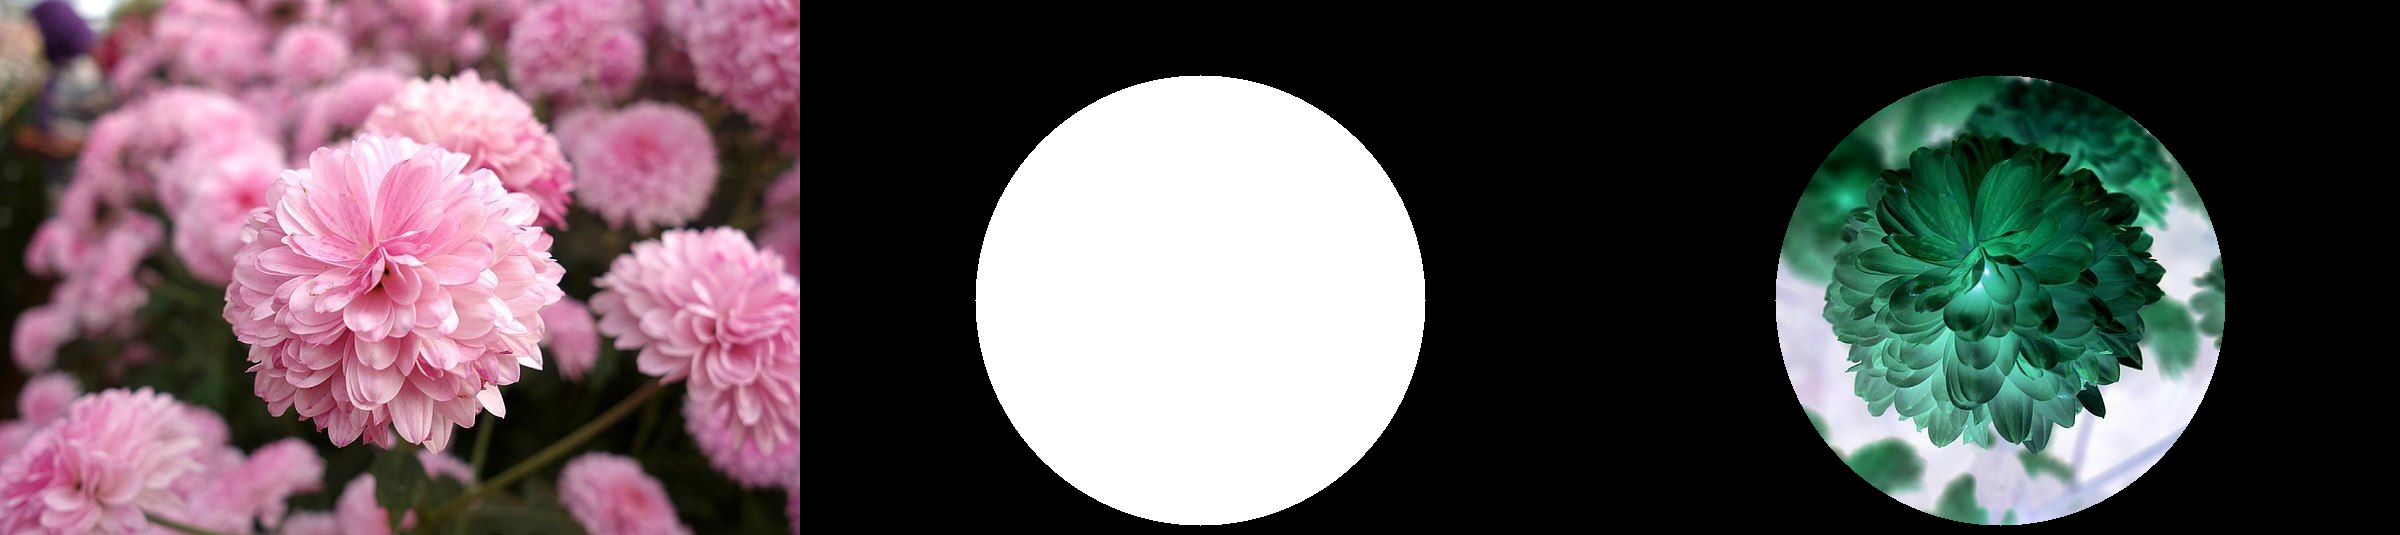

In [30]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (400, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

XOR
(Exlusive Or)


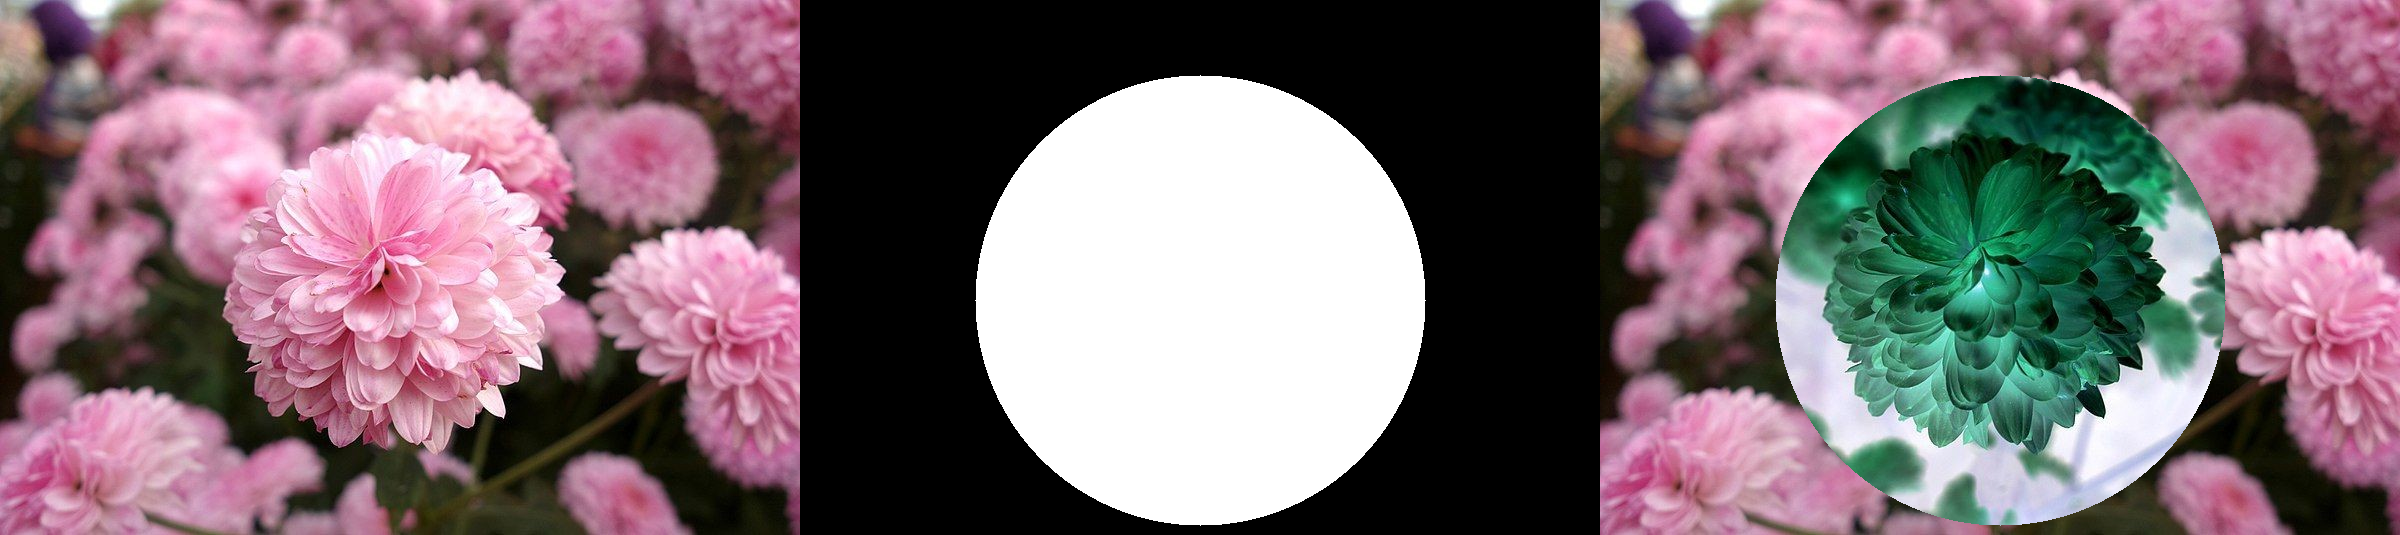

In [32]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (400, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

Tuliskan hasil analisa anda

- AND

Operasi bitwise AND antara gambar dan masker. Hanya piksel yang di dalam lingkaran yang akan terlihat, sedangkan piksel di luar lingkaran akan menjadi hitam.

- NOT

Operasi bitwise NOT pada gambar dan masker, kemudian bitwise AND hasilnya. Ini mengakibatkan gambar yang sepenuhnya terbalik dengan lingkaran yang terbalik, menghasilkan efek yang tidak diinginkan.

- OR

Operasi bitwise OR antara gambar dan masker. Ini menggabungkan gambar asli dengan lingkaran putih dari masker, menyebabkan area di luar lingkaran menjadi terpengaruh oleh masker.

- NAND

Operasi bitwise NAND antara gambar dan masker. Hasilnya adalah gambar yang hanya menampilkan area yang terbalik dari gambar asli di luar lingkaran masker.

- XOR

Operasi bitwise XOR antara gambar dan masker. Hasilnya adalah gambar yang menunjukkan area di dalam lingkaran masker yang berbeda dari gambar asli, sedangkan area di luar lingkaran masker akan menjadi hitam atau terpengaruh dengan cara lain.